In [59]:
import pandas as pd
import math
import numpy as np

In [60]:
data = pd.read_csv ("counters.online.csv")

In [61]:
print (data)

        run    cint7l0b  cmul7l0b  duration(s)  interacting_bunches
0    290222     2821944      1135         4613                    1
1    290223     1215525       507         2126                    1
2    290254    19597017      8005        15931                    2
3    290293   179288589     67797         3708                  376
4    290297   136426265     51979         2803                  376
..      ...         ...       ...          ...                  ...
182  292270   855332218    324706         3698                 2215
183  292273  2405815397    915526        10401                 2215
184  292274   999162786    380610         4354                 2215
185  292298  4403977663   1671359        19175                 2215
186  292397  1703934837    642637         7649                 2215

[187 rows x 5 columns]


In [62]:
import pandas as pd
df = pd.read_csv ("counters.online.csv")
df['Factor'] = (df['cint7l0b']/df['cmul7l0b'])
print(df)



        run    cint7l0b  cmul7l0b  duration(s)  interacting_bunches  \
0    290222     2821944      1135         4613                    1   
1    290223     1215525       507         2126                    1   
2    290254    19597017      8005        15931                    2   
3    290293   179288589     67797         3708                  376   
4    290297   136426265     51979         2803                  376   
..      ...         ...       ...          ...                  ...   
182  292270   855332218    324706         3698                 2215   
183  292273  2405815397    915526        10401                 2215   
184  292274   999162786    380610         4354                 2215   
185  292298  4403977663   1671359        19175                 2215   
186  292397  1703934837    642637         7649                 2215   

          Factor  
0    2486.294273  
1    2397.485207  
2    2448.097064  
3    2644.491482  
4    2624.641971  
..           ...  
182  2634.1743

In [63]:
import pandas as pd
df = pd.read_csv ("counters.online.csv")
df['Factor'] = (df['cint7l0b']/df['cmul7l0b'])
def weighted_average(df, weight ):
    return sum(df['Factor'] * df[weight]) / df[weight].sum()
print(weighted_average(df, 'duration(s)'))

2648.329074185676


In [64]:
import pandas as pd
dfonline = pd.read_csv ("counters.online.csv")
dfoffline =  pd.read_csv ("counters.offline.csv")

data = pd.merge(dfonline,dfoffline)
print(data)

#print(data['run'])
#print(data['interacting_bunches'])
#print(data['cint7ps'])

def weighted_average_online(df, weight):
    df['online_factor'] = (df['cint7l0b']/df['cmul7l0b'])
    return sum (df['online_factor'] * df[weight]) / df[weight].sum()


print(weighted_average_online(data, 'cint7ps'))

        run    cint7l0b  cmul7l0b  duration(s)  interacting_bunches  cint7all  \
0    290222     2821944      1135         4613                    1    138603   
1    290223     1215525       507         2126                    1     57552   
2    290254    19597017      8005        15931                    2    958655   
3    290293   179288589     67797         3708                  376     63676   
4    290297   136426265     51979         2803                  376     47081   
..      ...         ...       ...          ...                  ...       ...   
178  292270   855332218    324706         3698                 2215     73360   
179  292273  2405815397    915526        10401                 2215    198098   
180  292274   999162786    380610         4354                 2215     82265   
181  292298  4403977663   1671359        19175                 2215    365316   
182  292397  1703934837    642637         7649                 2215    123340   

     cint7ps  cmul7all  cmu

In [69]:
def compute_Fpu(mu):
    return mu/(1-np.exp(-1*mu))

print(compute_Fpu(1))

def compute_mu(df):
    flhc = 11245.0
    rate = df['cint7l0b']/df['duration(s)']
    NCINT7 = df['cint7ps']
    Nint_bunches = df['interacting_bunches']
    df['pileup'] = -1*np.log(((NCINT7*rate)/(Nint_bunches*flhc)))
    return 0

print(compute_mu(data))

def compute_FpuPerRun(df):
    df['Fpu'] = compute_Fpu(df['pileup'])
    
compute_FpuPerRun(data)
print(data)

1.5819767068693265
0
        run    cint7l0b  cmul7l0b  duration(s)  interacting_bunches  cint7all  \
0    290222     2821944      1135         4613                    1    138603   
1    290223     1215525       507         2126                    1     57552   
2    290254    19597017      8005        15931                    2    958655   
3    290293   179288589     67797         3708                  376     63676   
4    290297   136426265     51979         2803                  376     47081   
..      ...         ...       ...          ...                  ...       ...   
178  292270   855332218    324706         3698                 2215     73360   
179  292273  2405815397    915526        10401                 2215    198098   
180  292274   999162786    380610         4354                 2215     82265   
181  292298  4403977663   1671359        19175                 2215    365316   
182  292397  1703934837    642637         7649                 2215    123340   

     c

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

df.plot()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

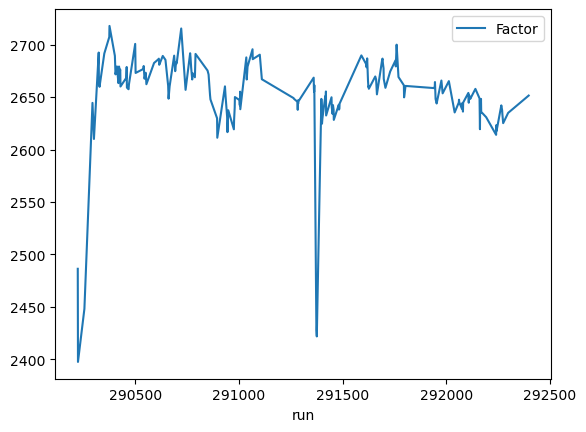

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv ("counters.online.csv")
df['Factor'] = (df['cint7l0b']/df['cmul7l0b'])
# gca stands for 'get current axis'
lines = df.plot.line(x='run', y='Factor')

plt.show()


In [15]:
import pandas as pd
data = pd.read_csv ("counters.offline.csv")
print (data)

        run  cint7all  cint7ps  cmul7all  cmul7ps  cmsl7all  cmsl7ps  \
0    290222    138603   138486      1119     1118     50296    50278   
1    290223     57552    57491       484      484     21027    21014   
2    290254    958655   957667      7845     7838    348635   348454   
3    290293     63676    61807     44363    43971    238072   236301   
4    290297     47081    46226     33013    32785    179041   177705   
..      ...       ...      ...       ...      ...       ...      ...   
178  292270     73360    70357    239943   235877    639816   631028   
179  292273    198098   190983    652701   642999   1745584  1723095   
180  292274     82265    79686    271233   267487    724297   715627   
181  292298    365316   350755   1198474  1178630   3197327  3153740   
182  292397    123340   117698    401941   394545   1069452  1053852   

     cint7all&0msl  cmsl7all&0mul  
0             2518           1119  
1             1038            484  
2            17625         

In [5]:
import pandas as pd
df = pd.read_csv ("counters.offline.csv")
df['Factor1'] = (df['cint7ps']/df['cint7all&0msl'])
print(df)

        run  cint7all  cint7ps  cmul7all  cmul7ps  cmsl7all  cmsl7ps  \
0    290222    138603   138486      1119     1118     50296    50278   
1    290223     57552    57491       484      484     21027    21014   
2    290254    958655   957667      7845     7838    348635   348454   
3    290293     63676    61807     44363    43971    238072   236301   
4    290297     47081    46226     33013    32785    179041   177705   
..      ...       ...      ...       ...      ...       ...      ...   
178  292270     73360    70357    239943   235877    639816   631028   
179  292273    198098   190983    652701   642999   1745584  1723095   
180  292274     82265    79686    271233   267487    724297   715627   
181  292298    365316   350755   1198474  1178630   3197327  3153740   
182  292397    123340   117698    401941   394545   1069452  1053852   

     cint7all&0msl  cmsl7all&0mul    Factor1  
0             2518           1119  54.998411  
1             1038            484  55.386

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv ("counters.offline.csv")
df['Factor1'] = (df['cint7l0b']/df['cmul7l0b'])
# gca stands for 'get current axis'
lines = df.plot.line(x='run', y='Factor1')

plt.show()

KeyError: 'cint7l0b'

In [9]:
import pandas as pd
import math
df = pd.read_csv ("counters.online.csv")
df = pd.read_csv ("counters.offline.csv")
M = math.log(['cint7ps']*['cint7all&0msl']/['interacting_bunches']*11.245)
F = math.M/(1-exp(-M))
df['MU'] = (df['cint7ps']/df['cint7all&0msl'])
df['Factor1'] = ((df['cmsl7all'] * df['cint7all'] /df['cmsl7all&0mul']) * df['cint7all&0msl'])*F
print(df)

TypeError: can't multiply sequence by non-int of type 'list'